# <font color='tomato'>PySpark Assignment</font>

1.   There are outputs given for some cells, you are suppose to obtain the exact output with code.
2.  Don't forget to write your name and reg# in the file name above.




In [5]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pyspark

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Required Libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import *
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import split
import numpy as np
import matplotlib.pyplot as plt

In [7]:
spark = SparkSession.builder.master("local[*]").appName('PySpark_Assignment').getOrCreate()

In [8]:
data_schema = [
               StructField('mpg', DoubleType(), True),
               StructField('cylinders', IntegerType(), True),
               StructField('displacement', DoubleType(), True),
               StructField('horsepower', DoubleType(), True),
               StructField('weight', IntegerType(), True),
               StructField('acceleration', DoubleType(), True),
               StructField('model year', IntegerType(), True),
               StructField('origin', StringType(), True),
               StructField('car name', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

df = spark.read.csv('/content/drive/MyDrive/car_data.csv',sep = ',',header = True,schema = final_struc )

df.show(10)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|         ford torino|
|15.0|        8|       429.0|     198.0|  4341|        10.0|        70|     1|    ford galaxie 500|
|14.0|        8|       454.0|     220.0|  4354|         9.0|        70|     1|    chevrolet impala|


In [9]:
Null_count = df.select([count(when(col(c).contains('None') | col(c).contains('NULL') | (col(c) == '' ) | col(c).isNull() | isnan(c), c )).alias(c) for c in df.columns])

Null_count.show()

+---+---------+------------+----------+------+------------+----------+------+--------+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name|
+---+---------+------------+----------+------+------------+----------+------+--------+
|  0|        0|           0|         6|     0|           0|         0|     0|       0|
+---+---------+------------+----------+------+------------+----------+------+--------+



In [10]:
#3. Handling Missing Values and Converting horsepower from string to integer 


print("Total No of Row:", df.count())
df=df.na.drop()                             # missing values are small so those rows can be deleted
print("After dropping row:", df.count())

df = df.withColumn("horsepower",df["horsepower"].cast(IntegerType()))

df.show(5)

Total No of Row: 398
After dropping row: 392
+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [11]:

df.columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [12]:
#5. Display dataframe in pandas dataframe table form first five rows
 
pdf=df.toPandas()

display(pdf.loc[0:4])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
#6. Print Schema

df.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- displacement: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- model year: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- car name: string (nullable = true)



In [14]:
#7. Renaming Columns

df = df.withColumnRenamed('model year', 'model_year')
df = df.withColumnRenamed('car name', 'car_name')

df.show(3)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 3 rows



In [15]:
#8.Display first five rows in list form

df.head(5)

[Row(mpg=18.0, cylinders=8, displacement=307.0, horsepower=130, weight=3504, acceleration=12.0, model_year=70, origin='1', car_name='chevrolet chevelle malibu'),
 Row(mpg=15.0, cylinders=8, displacement=350.0, horsepower=165, weight=3693, acceleration=11.5, model_year=70, origin='1', car_name='buick skylark 320'),
 Row(mpg=18.0, cylinders=8, displacement=318.0, horsepower=150, weight=3436, acceleration=11.0, model_year=70, origin='1', car_name='plymouth satellite'),
 Row(mpg=16.0, cylinders=8, displacement=304.0, horsepower=150, weight=3433, acceleration=12.0, model_year=70, origin='1', car_name='amc rebel sst'),
 Row(mpg=17.0, cylinders=8, displacement=302.0, horsepower=140, weight=3449, acceleration=10.5, model_year=70, origin='1', car_name='ford torino')]

In [16]:
#9. Describe complete dataset

df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+
|summary|              mpg|         cylinders|      displacement|        horsepower|            weight|      acceleration|       model_year|            origin|            car_name|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+
|  count|              392|               392|               392|               392|               392|               392|              392|               392|                 392|
|   mean|23.44591836734694| 5.471938775510204|194.41198979591837|104.46938775510205|2977.5841836734694|15.541326530612228| 75.9795918367347|1.5765306122448979|                null|
| stddev|7.805007486571802|1.7057832474527845|104.64400390890465| 38.49115993282846| 849.402560

In [17]:
#10. Describe Two columns mpg and horsepower

df.select(['mpg', 'horsepower']).describe().show()

+-------+-----------------+------------------+
|summary|              mpg|        horsepower|
+-------+-----------------+------------------+
|  count|              392|               392|
|   mean|23.44591836734694|104.46938775510205|
| stddev|7.805007486571802| 38.49115993282846|
|    min|              9.0|                46|
|    max|             46.6|               230|
+-------+-----------------+------------------+



In [18]:
#11. Describe the numerical columns only

pdf.describe(include=[np.number])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
#12. Lets get the cars with 'mpg' at least 23 (top 5 rows only)

df.filter(df.mpg >= 23).show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|24.0|        4|       113.0|        95|  2372|        15.0|        70|     3|toyota corona mar...|
|27.0|        4|        97.0|        88|  2130|        14.5|        70|     3|        datsun pl510|
|26.0|        4|        97.0|        46|  1835|        20.5|        70|     2|volkswagen 1131 d...|
|25.0|        4|       110.0|        87|  2672|        17.5|        70|     2|         peugeot 504|
|24.0|        4|       107.0|        90|  2430|        14.5|        70|     2|         audi 100 ls|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [20]:
#13. Show car names with horsepower not less than 80 and weight should not be less than 2k (top 5 rows only)

df.filter((df.horsepower>=80)&(df.weight>=2000)).show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [21]:
#14. Show top 3 rows with 'mpg' greater than 25 while 'origin' equal to 2.

df.filter((df.mpg>=25)&(df.origin==2)).show(3)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|26.0|        4|        97.0|        46|  1835|        20.5|        70|     2|volkswagen 1131 d...|
|25.0|        4|       110.0|        87|  2672|        17.5|        70|     2|         peugeot 504|
|25.0|        4|       104.0|        95|  2375|        17.5|        70|     2|            saab 99e|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 3 rows



In [22]:
#15. Obtain the following ouput

df.filter(df.car_name.contains('volkswagen')).show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|26.0|        4|        97.0|        46|  1835|        20.5|        70|     2|volkswagen 1131 d...|
|27.0|        4|        97.0|        60|  1834|        19.0|        71|     2|volkswagen model 111|
|23.0|        4|        97.0|        54|  2254|        23.5|        72|     2|   volkswagen type 3|
|22.0|        4|       121.0|        76|  2511|        18.0|        72|     2| volkswagen 411 (sw)|
|26.0|        4|        97.0|        46|  1950|        21.0|        73|     2|volkswagen super ...|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [23]:
#16. Extract Brands from car_name column & also replace Misspelled Brands

df= df.withColumn('carbrand', split(df['car_name'], ' ').getItem(0)) 
df = df.drop('car_name')

df=df.withColumn("carbrand", regexp_replace("carbrand", 'chevroelt', 'chevrolet'))
df=df.withColumn("Carbrand", regexp_replace("carbrand", 'chevy', 'chevrolet'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'vokswagen', 'volkswagen'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'vw', 'volkswagen'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'hi', 'harvester'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'maxda', 'mazda'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'toyouta', 'toyota'))
df=df.withColumn("carbrand", regexp_replace("carbrand", 'mercedes-benz', 'mercedes'))

df = df.withColumnRenamed('carbrand', 'brand')
df.show(15)

+----+---------+------------+----------+------+------------+----------+------+---------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|    brand|
+----+---------+------------+----------+------+------------+----------+------+---------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|    buick|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1| plymouth|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|      amc|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|     ford|
|15.0|        8|       429.0|       198|  4341|        10.0|        70|     1|     ford|
|14.0|        8|       454.0|       220|  4354|         9.0|        70|     1|chevrolet|
|14.0|        8|       440.0|       215|  4312|         8.5|        70|     1| plymouth|
|14.0|        8|     

In [24]:
#17. Show the average acceleration by car brands.

x=df.select('brand').distinct().count()

df.select(['acceleration', 'brand',]).groupBy('brand').mean().orderBy('brand').show(x)

+----------+------------------+
|     brand| avg(acceleration)|
+----------+------------------+
|       amc|15.070370370370371|
|      audi|15.942857142857141|
|       bmw|             12.65|
|     buick|14.700000000000003|
|  cadillac|             14.75|
|     capri|              14.9|
| chevrolet| 15.39787234042553|
|  chrysler|13.300000000000002|
|    datsun| 16.40869565217391|
|     dodge|14.460714285714284|
|      fiat|             15.65|
|      ford| 15.29166666666667|
| harvester|              18.5|
|     honda| 15.99230769230769|
|     mazda|16.091666666666665|
|  mercedes| 19.53333333333333|
|   mercury|14.963636363636363|
|    nissan|              14.5|
|oldsmobile|             16.02|
|      opel|            15.225|
|   peugeot|             19.55|
|  plymouth|14.851612903225801|
|   pontiac|14.081249999999999|
|   renault|              17.3|
|      saab|            15.175|
|    subaru|            16.925|
|    toyota| 16.03846153846154|
|   triumph|              15.1|
|volkswa

In [25]:
#18. Calculate the Maximum MPG by car brands.

x=df.select('brand').distinct().count()

df.select(['mpg', 'brand',]).groupBy('brand').max().orderBy('brand').show(x)

+----------+--------+
|     brand|max(mpg)|
+----------+--------+
|       amc|    27.4|
|      audi|    36.4|
|       bmw|    26.0|
|     buick|    30.0|
|  cadillac|    23.0|
|     capri|    25.0|
| chevrolet|    34.0|
|  chrysler|    26.0|
|    datsun|    40.8|
|     dodge|    36.0|
|      fiat|    37.3|
|      ford|    36.1|
| harvester|     9.0|
|     honda|    44.6|
|     mazda|    46.6|
|  mercedes|    30.0|
|   mercury|    36.0|
|    nissan|    36.0|
|oldsmobile|    38.0|
|      opel|    28.0|
|   peugeot|    30.0|
|  plymouth|    39.0|
|   pontiac|    33.5|
|   renault|    36.0|
|      saab|    25.0|
|    subaru|    33.8|
|    toyota|    39.1|
|   triumph|    35.0|
|volkswagen|    44.3|
|     volvo|    30.7|
+----------+--------+



### Create any 2 great Visualizations from dataset (should be different from the one taught in Class).

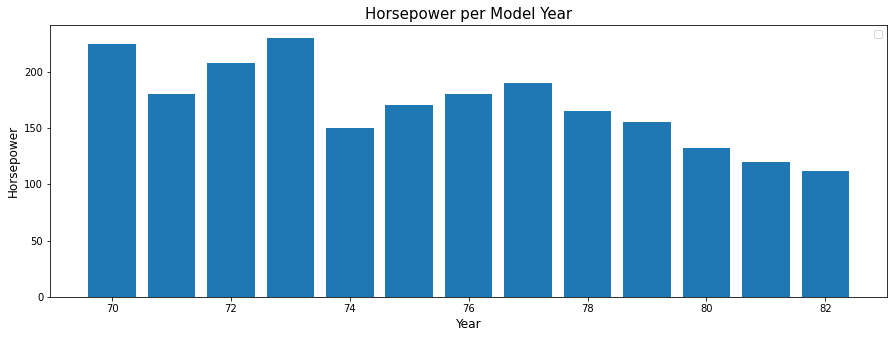

In [52]:
#Visualization_1
import matplotlib.pyplot as plt

df1=df.select('model_year', 'displacement','horsepower','acceleration','cylinders').orderBy('model_year').groupBy('model_year').max()

pdf1=df1.toPandas()

x=pdf1['model_year'].tolist()
y1=pdf1["max(displacement)"].tolist()
y2=pdf1["max(horsepower)"].tolist()
y3=pdf1["max(acceleration)"].tolist()
y4=pdf1["max(cylinders)"].tolist()

plt.figure(figsize=(15, 5))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Horsepower',fontsize=12)
plt.title("Horsepower per Model Year",fontsize=15)


plt.bar(x, y2  )

plt.legend()
plt.show()

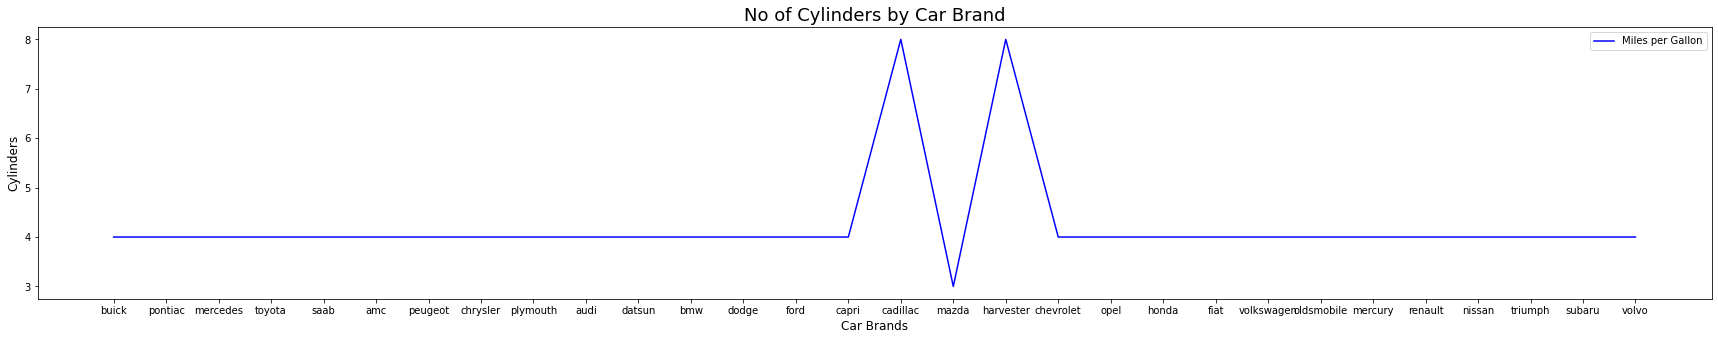

In [62]:
dfplot=df.select('mpg', 'brand').orderBy('brand').groupBy('brand').max()

dfplot1=df.select('cylinders','brand').orderBy('brand').groupBy('brand').min()

pdf1=dfplot.toPandas()

pdf2=dfplot1.toPandas()

x=pdf1['brand'].tolist()
y2=pdf2["min(cylinders)"].tolist()

plt.figure(figsize=(30, 5))
plt.xlabel('Car Brands',fontsize=12)
plt.ylabel('Cylinders',fontsize=12)
plt.title("No of Cylinders by Car Brand",fontsize=18)

plt.plot(x,y2,color='blue',label='Miles per Gallon')

plt.legend()
plt.show()
